# The Monty Hall Problem

The Monty Hall Problem is a well-known probability puzzle. [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem) states that it became popular after a letter from Craig F. Whitaker appeared in Marilyn vos Savant's "Ask Marilyn" column in a 1990 edition of Parade magazine, and can be summarised as the following:

"_Consider a game show in which a contestant must choose one of three closed doors; behind one of these doors is an expensive car and behind the other two there is nothing. If the contestant correctly chooses the door with the car behind, they are awarded the car; else, the contestant goes home empty-handed._

_Suppose the contestant chooses a door, and the host subsequently opens one of the other two doors to reveal that there is nothing behind the door the host opened. The host then says to the contestant: "You now have the option to change your mind to the third door that you had not previously selected or to remain with your original selection."_ 

_The question to be answered is: what should the contestant do to maximise their chances of winning the car?_"

## A possible solution

First, we assume that the host _never_ opens the door concealing the car, since this would give the game away. I don't think we need to make assumptions about the probabilistic behaviour of the host in the solution presented below, as is necessary in other solutions.

### Bayes's Theorem

This problem can be solved using Bayes's Theorem. Given a probability measure $\mathbb{P}$ on the space $\mathcal{F}$ of events, this states that for all $A, B \in \mathcal{F}$, 

\begin{align}
    \mathbb{P}\left(B \mid A\right) &= \frac{\mathbb{P}\left(A \mid B\right)\cdot \mathbb{P}\left(B\right)}{\mathbb{P}\left(A\right)}\\
    &= \frac{\mathbb{P}\left(A \mid B\right)\cdot \mathbb{P}\left(B\right)}{\mathbb{P}\left(A \mid B\right)\cdot \mathbb{P}(B) + \mathbb{P}\left(A\mid B^c\right)\cdot \mathbb{P}(B^c)}.
\end{align}

Below, we will explore what happens when we take $B$ to be the event

\begin{equation}
B = \{ \text{the contestant initially chooses the correct door before the host opens one of the others} \}
\end{equation}

and $A$ to be the event 

\begin{equation}
A = \{ \text{a door other than the one the contestant initially chose has nothing behind it} \}.
\end{equation}

With this choice, Bayes's Theorem will give us $\mathbb{P}\left(B \mid A\right)$, the probability that the contestant has initially chosen the door with the car behind it given that we have observed that there is another door with nothing behind it (an observation we have made through the host's actions). We can use this to then inform our decision about whether to change to the remaining door or to stick with the contestant's original choice.

### Choosing an appropriate probabilistic model

We need to choose the measure $\mathbb{P}$ that gives a reasonable probability to these events. Based on the description of the problem, a reasonable model for the probability with which $B$ occurs -- i.e. a reasonable choice of measure $\mathbb{P}$ -- is to assign

\begin{equation}
    \mathbb{P}(B) = \frac{1}{3}.
\end{equation}

This is because the contestant has no reason to believe initially that the car is behind any one door over another.

### The consequences of this model

Let's now consider the terms $\mathbb{P}(A \mid B)$ and $\mathbb{P}(A \mid B^c)$ under this model. 

The question to ask ourselves is: 

<blockquote>
    
    What new information do we learn by observing the event "a door other than the one the contestant 
    initially chose has nothing behind it"?
</blockquote>

The answer is: nothing, because we always know (assuming we believe some ground truths about the system such as the fact that there is indeed one and only one car behind one of the doors...) that there is at least one door, other than the door the contestant has chosen, that has nothing behind it, and this is true whether or not we have chosen the correct door. Indeed, when the contestant has chosen the incorrect door initially, one of the other doors left has nothing behind it, and when the contestant has chosen correctly, there are two such doors. So in both cases,

\begin{equation}
\mathbb{P}(A \mid B) = \mathbb{P}(A \mid B^c) = 1.
\end{equation}

<!-- The first of these is the probability that 

$$\text{there is another door, other than the one the constestant chose, that has nothing behind it}$$

given that we have assumed 

$$\text{the contestant initially chooses the correct door before the host opens one of the others}$$ 

to be true. Clearly, we have

\begin{equation}
    \mathbb{P}(A \mid B) = 1,
\end{equation}

because if the contestant definitely chose the door with the car behind it initially, then the host can _only_ open a door with nothing behind it. -->

### Putting everything together

To complete the picture, we can put the values of the terms we calculated into Bayes's Theorem:

\begin{equation}
    \mathbb{P}(B \mid A) = \frac{1\cdot \frac{1}{3}}{1\cdot \frac{1}{3} + 1\cdot \frac{2}{3}} = \frac{1}{3}.
\end{equation}

So the probability that the door we have chosen is correct, given that we have seen another door without anything behind it, remains at the value $\frac{1}{3}$.

### What should the contestant do?

Based on the result above, we would like to make a decision about whether to change the selection of door to the other remaining closed door or to keep our original selection. Intuitively, we should switch, since we have a lower probability of being right than wrong since $\frac{1}{3} < \frac{1}{2}$.

We can make this a little more formal with some Bayesian decision theory. 

Consider the (random) utility function

\begin{align}
    U &= c \mathbb{1}\left[\text{contestant chooses the correct door} \mid A\right] + n \left(1 - \mathbb{1}\left[\text{contestant chooses the correct door} \mid A\right]\right)\\ &= (c - n) \mathbb{1}\left[\text{contestant chooses the correct door} \mid A\right] + n,
\end{align}

where $c, n \in \mathbb{R}$ are the utilities the contestant assigns to winning the car and nothing, respectively. Under the assumption that we would prefer to win a car, we have $c > n$.

To answer the question of what the contestant should do when given the option to stick with their choice of door or change, we can answer the question of how to maximise the expected value of the utility seen by the contestant. The expected utility is then

\begin{equation}
    \mathbb{E}[U] = (c - n)\cdot \mathbb{P}\left(\text{contestant chooses the correct door} \mid A\right) + n
\end{equation}

How do we find the term $\mathbb{P}\left(\text{contestant chooses the correct door} \mid A\right)$? This can happen if either (a) the contestant guessed correctly in the first place and doesn't switch, or (b) the contestant guessed incorrectly to begin with and switches. So:

\begin{align}
    \mathbb{P}\left(\text{contestant chooses the correct door} \mid A\right) &= \mathbb{P}\left(\text{contestant chooses the correct door}, B \mid A\right) + \mathbb{P}\left(\text{contestant chooses the correct door}, B^c \mid A\right)\\
    &= (1 - \delta) \cdot \mathbb{P}(B \mid A) + \delta\cdot \mathbb{P}(B^c \mid A) \\
    &= \frac{1}{3}\left(1 + \delta\right)
\end{align}

where we define $\delta = \mathbb{P}(\text{ contestant switches to the other unopened door} \mid A )$.

Now

\begin{equation}
    \mathbb{E}[U] = \frac{1}{3}(c - n)(1 + \delta) + n
\end{equation}

and since $\delta \in [0,1]$ and $\mathbb{E}[U]$ increases with $\delta$, we maximise $\mathbb{E}[U]$ by taking $\delta = 1$. That is, we maximise the expected value of our gamble by always switching.

### Numerical experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
deltas = np.linspace(0,1,1000)
N = 1000
# 3 doors
D = 3
# Utility from getting car
c = 1
# Utility from getting nothing
n = 0

def pick_door(proportions=[1./D for i in range(D)]):
    omega = np.random.random()
    top = 0.
    selection = 0
    while omega > top:
        top += proportions[selection]
        if omega < top:
            break
        selection += 1
    return selection

In [29]:
utilities = {i:0 for i in range(deltas.size)}
proportions = [1./3, 1./3., 1./3.]

# We explore what happens at different values for delta
for m, delta in enumerate(deltas):
    # We perform N experiments at each delta
    for i in range(N):
        # Pick a door to place the car behind
        car_door = pick_door(proportions)
        # Pick a door
        selected_door = pick_door()
        # Pick a door to open
        options = list(range(D))
        options.remove(car_door)
        try:
            options.remove(selected_door)
        except ValueError:
            _ = 0
        opened_door = np.random.choice(options)
        # Decide to switch or not
        if np.random.random() < delta:
            options = list(range(D))
            options.remove(selected_door)
            options.remove(opened_door)
            final_door = np.random.choice(options)
        else:
            final_door = selected_door
        if final_door == car_door:
            utilities[m] += c
        else:
            utilities[m] += n

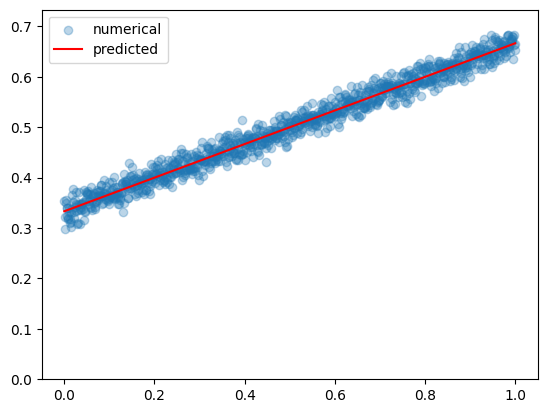

In [32]:
plt.scatter(deltas, [u/N for u in utilities.values()], alpha=0.3, label='numerical')
plt.ylim([0,2./3.*1.1])
plt.plot(deltas, 1./3.*(1 + deltas), c='r', label='predicted')
plt.legend()

## Interesting property

Interestingly (I think, at least), none of the above seems to change if the probability with which the car is actually behind any of the three doors is not uniform, provided we still place a uniform belief distribution over $B$ i.e. choose $\mathbb{P}(B) = 1/3$. That is, if the probability with which the car resides behind door 1 or 2 or 3 is not $1/3$ each, and instead is $1/3$, $2/3$, and $0$, or anything else, then the results are exactly the same. This is because

\begin{equation}
        \mathbb{P}(B) = \sum_{i = 1}^D \mathbb{P}(\text{car behind door } i) \cdot \mathbb{P}(\text{contestant chooses door } i) = \frac{1}{D} \sum_{i=1}^D \mathbb{P}(\text{car behind door } i) = \frac{1}{D} \cdot 1.
\end{equation}

where $D$ is the number of doors (i.e. 3 in the above workings and experiments). So the prior belief distribution can be misspecified in this way (i.e. the model can be wrong in this way) but this makes no difference to the resulting correctness of the analysis that follows. The experiment below seems to corroborate this:

In [33]:
utilities = {i:0 for i in range(deltas.size)}
# Make the car appear behind different doors with non-uniform probability
proportions = [1./3, 2./3. - 0.04, 0.04]

# We explore what happens at different values for delta
for m, delta in enumerate(deltas):
    # We perform N experiments at each delta
    for i in range(N):
        # Pick a door to place the car behind
        car_door = pick_door(proportions)
        # Pick a door
        selected_door = pick_door()
        # Pick a door to open
        options = list(range(D))
        options.remove(car_door)
        try:
            options.remove(selected_door)
        except ValueError:
            _ = 0
        opened_door = np.random.choice(options)
        # Decide to switch or not
        if np.random.random() < delta:
            options = list(range(D))
            options.remove(selected_door)
            options.remove(opened_door)
            final_door = np.random.choice(options)
        else:
            final_door = selected_door
        if final_door == car_door:
            utilities[m] += c
        else:
            utilities[m] += n

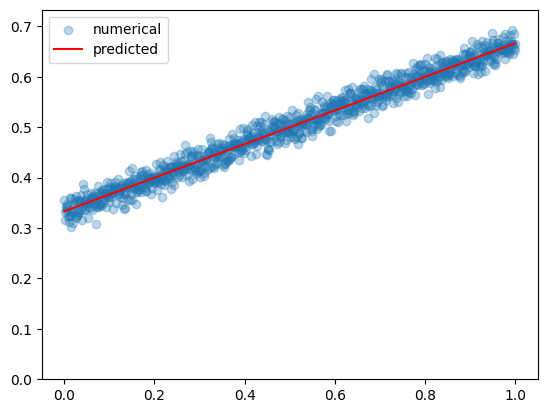

In [34]:
plt.scatter(deltas, [u/N for u in utilities.values()], alpha=0.3, label='numerical')
plt.ylim([0,2./3.*1.1])
plt.plot(deltas, 1./3.*(1 + deltas), c='r', label='predicted')
plt.legend()